In [26]:
#Librerías 
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import pandas.util.testing as tm
# Para gráficos
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import heatmap
from scipy import stats

# Para dividir el dataset en train  y test
from sklearn.model_selection import train_test_split
from sklearn import model_selection

# Algoritmo del Árbol de Decisión
from sklearn.tree import (DecisionTreeClassifier, plot_tree)

# Validación Cruzada 
from sklearn.model_selection import GridSearchCV

# Para calcular métricas
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report,
                            roc_curve, roc_auc_score, precision_recall_curve, plot_confusion_matrix) 

# Para la Normalización 
from sklearn.preprocessing import StandardScaler

#Colors
BLUE   = '#5DADE2'
RED    = '#ff7043'
ORANGE = '#F5B041'
GREEN  = '#58D68D'
YELLOW = '#F4D03F'

# Utiles
from utiles import basic_metrics
from utiles import plot_cm
from utiles import plot_roc_pr
from utiles import PlotROC
from utiles import PlotPR
from utiles import plot_curve

In [ ]:
filename = 'yup_curated_data.csv'  #trabajé con el archivo que me pasó Gustavo: train_curated_data.csv
dataset = pd.read_csv(os.path.join('..', 'dataset', filename))

**División y normalización de los datos**

In [8]:
# División entre instancias y etiquetas
X, y = datos_curados.iloc[:, 1:], datos_curados.student_rating_cat

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# normalización
escalado = StandardScaler()
escalado.fit(X_train)
X_train = escalado.transform(X_train)
X_test  = escalado.transform(X_test)  

##**Ejercicio 3: Árboles de Decisión**

**Árboles de Decisión con parámetros por defecto.**

In [9]:
arbol_decision = DecisionTreeClassifier(random_state = 42) # random_state=3  # para que coincida con el random_state elegido para SGD

print('Parámetros utilizados: \n', np.array(list(arbol_decision.get_params(deep=False).items())))

Parámetros utilizados: 
 [['ccp_alpha' 0.0]
 ['class_weight' None]
 ['criterion' 'gini']
 ['max_depth' None]
 ['max_features' None]
 ['max_leaf_nodes' None]
 ['min_impurity_decrease' 0.0]
 ['min_impurity_split' None]
 ['min_samples_leaf' 1]
 ['min_samples_split' 2]
 ['min_weight_fraction_leaf' 0.0]
 ['presort' 'deprecated']
 ['random_state' 42]
 ['splitter' 'best']]


**Entrenamiento**

In [10]:
arbol_decision.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

**Predicción**

In [11]:
y_train_pred_arbolD = arbol_decision.predict(X_train)
y_test_pred_arbolD  = arbol_decision.predict(X_test)

Accuracy con train

In [ ]:
print ('Accuracy: %d ' % ((np.sum(y_train == y_train_pred_arbolD))/float(y_train.size)*100))

Accuracy con test

In [22]:
print ('Accuracy: %d ' % ((np.sum(y_test == y_test_pred_arbolD))/float(y_test.size)*100))

Accuracy: 100 


**Valores máximos de profundidad y cantidad de hojas máxima**

In [12]:
print('Profundidad máxima del árbol:', arbol_decision.get_depth())
print('Cantidad máxima de hojas:', arbol_decision.get_n_leaves())

Profundidad máxima del árbol: 1
Cantidad máxima de hojas: 2


**Gráficos**

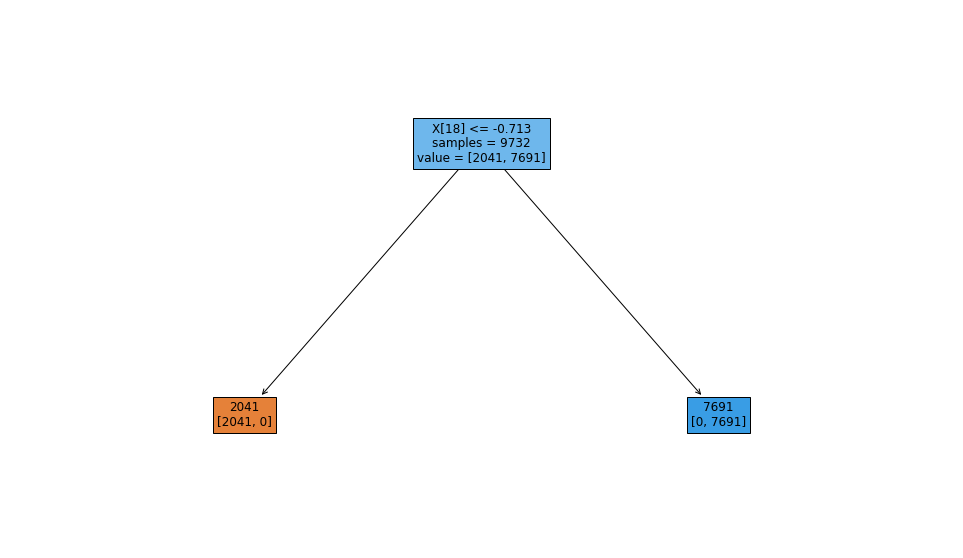

In [14]:
plt.figure(figsize=(17,10))
plot_tree(arbol_decision, impurity=False, fontsize=12, filled=True, label='root')  #filled=True,
plt.show()

**Métricas**


In [16]:
print('************************************************************')
ad_train = basic_metrics(y_train, y_train_pred_arbolD, 'Train')
print('------------------------------------------------------------')
ad_test = basic_metrics(y_test, y_test_pred_arbolD, 'Test')
print('------------------------------------------------------------')

************************************************************
Métricas Train:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000      2041
           1      1.000     1.000     1.000      7691

    accuracy                          1.000      9732
   macro avg      1.000     1.000     1.000      9732
weighted avg      1.000     1.000     1.000      9732

Confusion Matrix: 
[[2041    0]
 [   0 7691]]
------------------------------------------------------------
Métricas Test:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000       473
           1      1.000     1.000     1.000      1960

    accuracy                          1.000      2433
   macro avg      1.000     1.000     1.000      2433
weighted avg      1.000     1.000     1.000      2433

Confusion Matrix: 
[[ 473    0]
 [   0 1960]]
------------------------------------------------------------


**Gráfico de matriz de confusión**

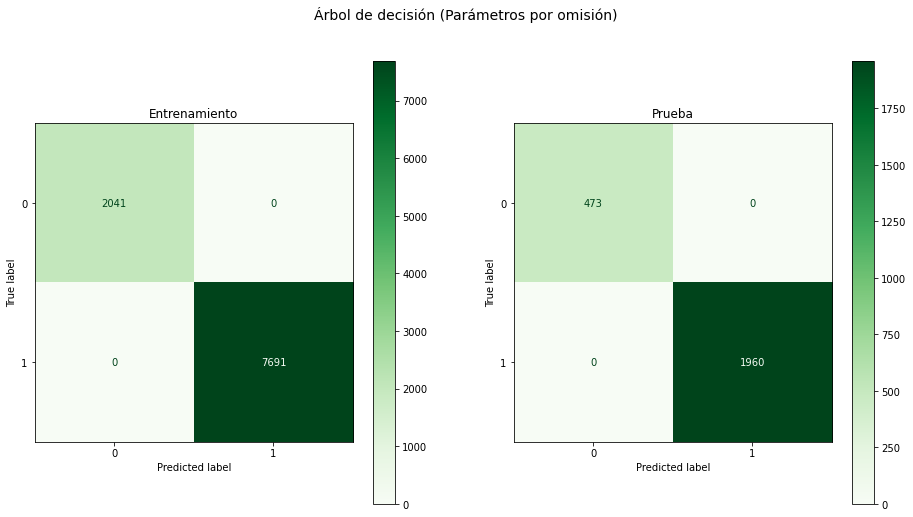

In [24]:
fig, axs = plt.subplots(1,2,figsize=(14,8))
fig.suptitle('Árbol de decisión (Parámetros por omisión)', size= 14)
axs[0].title.set_text('Entrenamiento')
axs[1].title.set_text('Evaluación')
fig.tight_layout(pad=5.0)
np.set_printoptions(precision=2)
titles_options = [("Entrenamiento", 0, X_train, y_train_pred_arbolD, None, 'd'),
                  ("Prueba", 1, X_test, y_test_pred_arbolD,  None, 'd'),
                 ]

for title, row, x_val, y_val, norm, val_format in titles_options:
    disp = plot_confusion_matrix(arbol_decision, x_val, y_val,
                                 cmap=plt.cm.Greens,
                                 normalize=norm,
                                 values_format=val_format,
                                 ax=axs[row]
                                 )
    disp.ax_.set_title(title)

**Curvas ROC y PR**

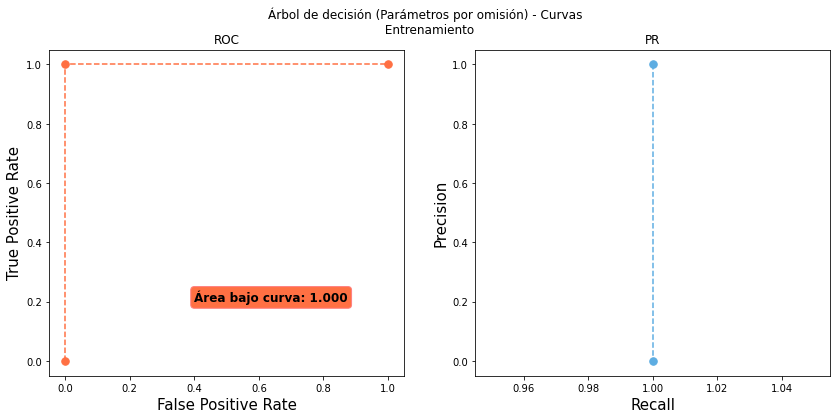

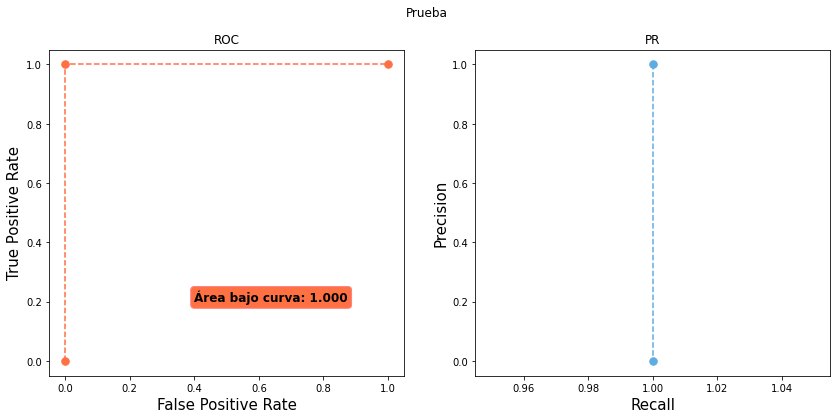

In [33]:
PlotCurves(y_train, y_train_pred_arbolD, Title='Árbol de decisión (Parámetros por omisión) - Curvas \n Entrenamiento')
PlotCurves(y_test, y_test_pred_arbolD, Title='Prueba')

##**Ejercicio 3.2: Ajuste de Hiperparámetros**

In [39]:
arbol_decision_param = DecisionTreeClassifier(random_state= 42)

**Opciones de parámetros**

In [64]:
param_AD = [
  {'splitter': ['best'],
          'criterion': ['gini', 'entropy'],
          'max_depth': np.arange(2,8,2),
          'min_samples_leaf': np.arange(1,10),
          'min_samples_split': np.arange(2,10),
          'max_features': [None, 'sqrt', 'log2']
          },
  {'splitter': ['random'],
          'criterion': ['gini', 'entropy'],
          'max_depth': list(np.arange(4,24,2))+[None],
          'min_samples_leaf': np.arange(1,10),
          'min_samples_split': np.arange(2,10)
          }
]

**Utilizamos grid-search con 5-fold cross-validation**



In [65]:
grid_ad = GridSearchCV(arbol_decision_param, param_AD, cv=5, scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'], refit=False)
grid_ad.fit(X_train, y_train);  #

In [66]:
# los resultados de la búsqueda lo guardamos como dataframe
arbol_decision_param_df = pd.DataFrame(grid_ad.cv_results_) # 2880 rows × 43 columns


In [67]:
arbol_decision_param_df  

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_precision_weighted,split1_test_precision_weighted,split2_test_precision_weighted,split3_test_precision_weighted,split4_test_precision_weighted,mean_test_precision_weighted,std_test_precision_weighted,rank_test_precision_weighted,split0_test_recall_weighted,split1_test_recall_weighted,split2_test_recall_weighted,split3_test_recall_weighted,split4_test_recall_weighted,mean_test_recall_weighted,std_test_recall_weighted,rank_test_recall_weighted,split0_test_f1_weighted,split1_test_f1_weighted,split2_test_f1_weighted,split3_test_f1_weighted,split4_test_f1_weighted,mean_test_f1_weighted,std_test_f1_weighted,rank_test_f1_weighted
0,0.008446,0.001017,0.005771,0.001628,gini,2,None,1,2,best,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
1,0.007524,0.000109,0.004787,0.000108,gini,2,None,1,3,best,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
2,0.007387,0.000076,0.004710,0.000131,gini,2,None,1,4,best,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
3,0.007333,0.000050,0.004617,0.000080,gini,2,None,1,5,best,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
4,0.007540,0.000296,0.004825,0.000368,gini,2,None,1,6,best,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,0.004096,0.000768,0.005311,0.001021,entropy,None,NaN,9,5,random,"{'criterion': 'entropy', 'max_depth': None, 'm...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
2876,0.003868,0.000135,0.004776,0.000300,entropy,None,NaN,9,6,random,"{'criterion': 'entropy', 'max_depth': None, 'm...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
2877,0.003768,0.000066,0.004665,0.000231,entropy,None,NaN,9,7,random,"{'criterion': 'entropy', 'max_depth': None, 'm...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
2878,0.003712,0.000094,0.004583,0.000163,entropy,None,NaN,9,8,random,"{'criterion': 'entropy', 'max_depth': None, 'm...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1


In [68]:
# Seleccionamos las columnas que serán útiles para elegir las configuraciones con mejor performance
arbol_decision_param_df = arbol_decision_param_df[['param_criterion', 'param_max_depth',
                              'param_min_samples_leaf', 'param_splitter', 'params', 'mean_test_accuracy', 
                              'std_test_accuracy', 'rank_test_accuracy','mean_test_precision_weighted','std_test_precision_weighted',
                              'rank_test_precision_weighted', 'mean_test_recall_weighted','std_test_recall_weighted',
                               'rank_test_recall_weighted', 'mean_test_f1_weighted', 'std_test_f1_weighted', 'rank_test_f1_weighted']]

In [70]:
# Seleccionamos los que tienen mejores valores para acurracy, precision, recall y f1.

arbol_decision_según_accuracy = arbol_decision_param_df.loc[arbol_decision_param_df.rank_test_accuracy.idxmin()]
arbol_decision_según_precision = arbol_decision_param_df.loc[arbol_decision_param_df.rank_test_precision_weighted.idxmin()]
arbol_decision_según_recall = arbol_decision_param_df.loc[arbol_decision_param_df.rank_test_recall_weighted.idxmin()]
arbol_decision_según_f1 = arbol_decision_param_df.loc[arbol_decision_param_df.rank_test_f1_weighted.idxmin()]
#
print('-------------------------------------------------------------------------------'
      '\n Puntaje y parámetros correspondiente a los modelos con mejor performance según:'
      '\n ------------------------------------------------------------------------------'
      '\n Accuracy  {:.4f}: {}\n Precision {:.4f}: {}\n Recall    {:.4f}: {}'
      '\n F1-Score  {:.4f}: {}\n'.format(
          arbol_decision_según_accuracy.mean_test_accuracy, arbol_decision_según_accuracy.params,
          arbol_decision_según_precision.mean_test_precision_weighted, arbol_decision_según_precision.params,
          arbol_decision_según_recall.mean_test_recall_weighted, arbol_decision_según_recall.params,
          arbol_decision_según_f1.mean_test_f1_weighted, arbol_decision_según_f1.params),
      '-------------------------------------------------------------------------------')

-------------------------------------------------------------------------------
 Puntaje y parámetros correspondiente a los modelos con mejor performance según:
 ------------------------------------------------------------------------------
 Accuracy  1.0000: {'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
 Precision 1.0000: {'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
 Recall    1.0000: {'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
 F1-Score  1.0000: {'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
 -------------------------------------------------------------------------------


Debido a que los modelos resultantes tienen valores similares, analizaremos sólo uno.

De acuerdo a los valores obtenidos en el punto anterior, ejecutamos el algoritmo 'DecisionTreeClassifier' utilizando los parámetros obtenidos para accuracy:

In [71]:
arbol_decision_ac = DecisionTreeClassifier(**arbol_decision_según_accuracy.params, random_state= 42)

**Entrenamiento**

In [72]:
arbol_decision_ac.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

**Predicción**

In [73]:
y_train_pred_arbol_ac = arbol_decision_ac.predict(X_train)
y_test_pred_arbol_ac = arbol_decision_ac.predict(X_test)

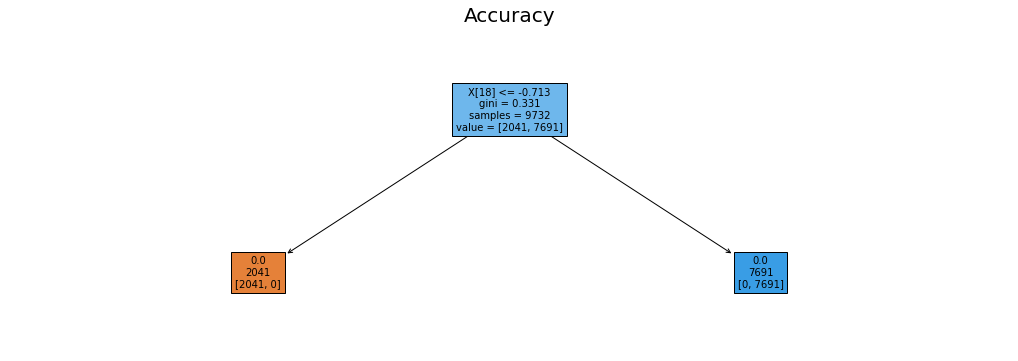

In [74]:
# arbol generado por el modelo 'arbol_decision_ac' 
plt.figure(figsize=(18,6))
plot_tree(arbol_decision_ac, filled=True, max_depth= 4, fontsize=10, label='root')
plt.title('Accuracy', size=20)
plt.show()

In [75]:
# esto creo se podría obviar ya que los valores están a la vista
print('-----------------------------------')
print('Profundidad máxima según métrica:'
      '\n Accuracy : {}'
      .format(
          arbol_decision_ac.get_depth()
      ))
print('-----------------------------------')
print('Cantida de hojas según métrica:'
      '\n Accuracy : {}' 
      .format(
          arbol_decision_ac.get_n_leaves()
      ))
print('-----------------------------------')

-----------------------------------
Profundidad máxima según métrica:
 Accuracy : 1
-----------------------------------
Cantida de hojas según métrica:
 Accuracy : 2
-----------------------------------


**Matrix de confusión**

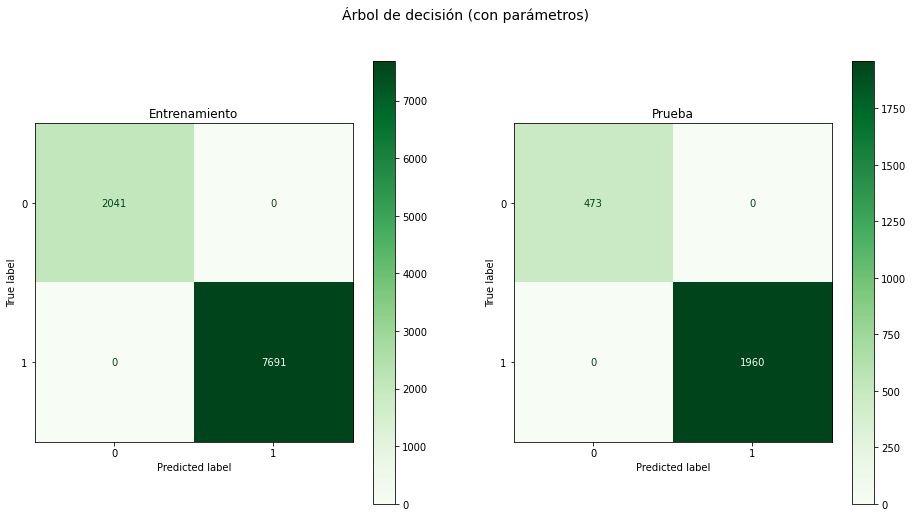

In [78]:
fig, axs = plt.subplots(1,2,figsize=(14,8))
fig.suptitle('Árbol de decisión (con parámetros)', size= 14)
axs[0].title.set_text('Entrenamiento')
axs[1].title.set_text('Evaluación')
fig.tight_layout(pad=5.0)
np.set_printoptions(precision=2)
titles_options = [("Entrenamiento", 0, X_train, y_train_pred_arbol_ac, None, 'd'),
                  ("Prueba", 1, X_test, y_test_pred_arbol_ac,  None, 'd'),
                 ]

for title, row, x_val, y_val, norm, val_format in titles_options:
    disp = plot_confusion_matrix(arbol_decision_ac, x_val, y_val,
                                 cmap=plt.cm.Greens,
                                 normalize=norm,
                                 values_format=val_format,
                                 ax=axs[row]
                                 )
    disp.ax_.set_title(title)

**Curvas ROC y PR**

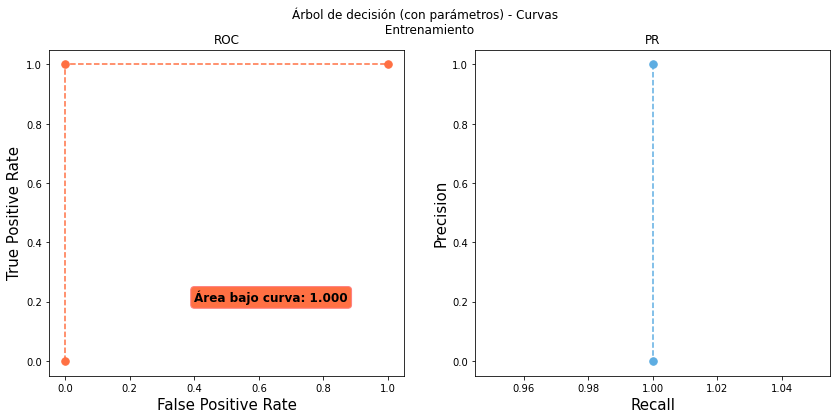

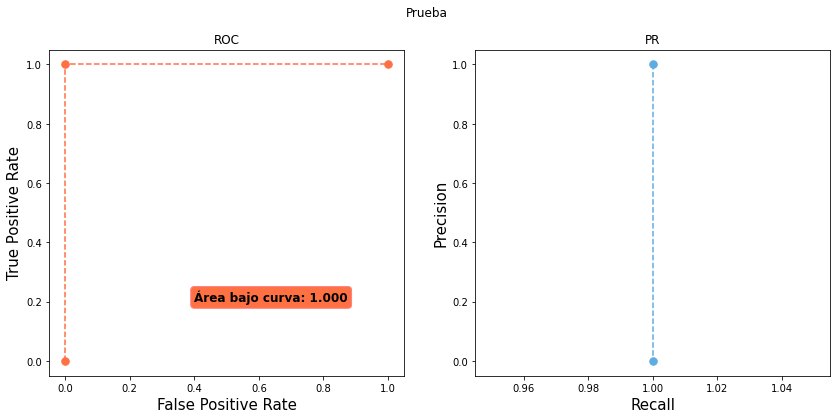

In [76]:
PlotCurves(y_train, y_train_pred_arbol_ac, Title='Árbol de decisión (con parámetros) - Curvas \n Entrenamiento')
PlotCurves(y_test, y_test_pred_arbol_ac, Title='Prueba')